In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pandas.plotting import scatter_matrix
from src.california_housing import read_data

# Remark

To perform a regression, especially a linear regression several assumptions have to be fulfilled in order to for a model to provide accurate and reliable results. 

# Load Data

In [2]:
df_train = read_data.read_file("fish_regression", "strat_train_set", csv=True) 

# Assumption 1: Linearity

**Linearity**: The relationship between the independent variable (or variables) and the dependent variable (target) is assumed to be linear. The model assumes that a change in the independent variable results in a constant change in the dependent variable. This is the case here. All independant variables which we will include in our model have a close to linear relationship with the target variable weight. However, the relationship is not clearly linear, actually it is non-linear and a polynomial regression is most likely better suited for this regression.

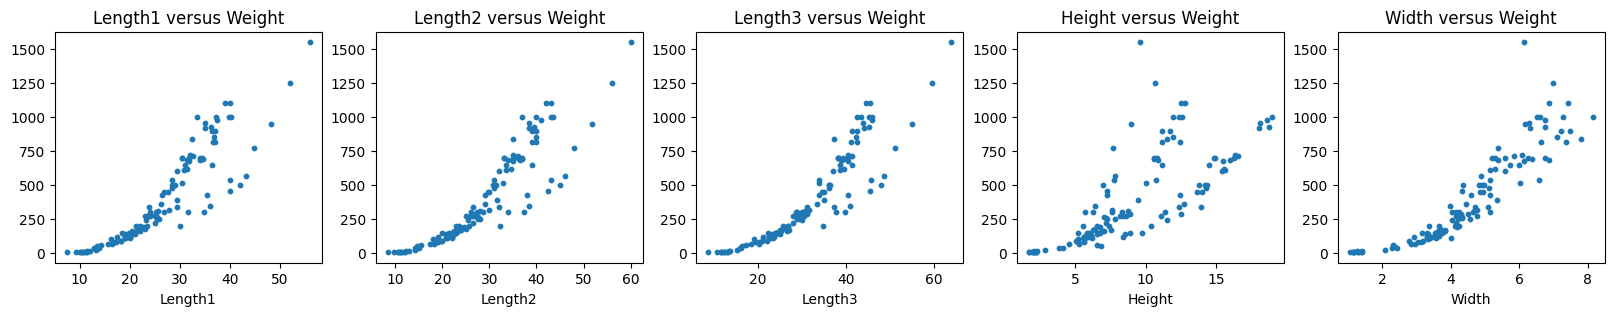

In [3]:
# Create basic Scatter plot
fig, ax = plt.subplots(figsize=(20, 3), ncols=5)

# List of column names to plot
columns_to_plot = ["Length1", "Length2", "Length3", "Height", "Width"]

for i, column in enumerate(columns_to_plot):
    ax[i].scatter(df_train[column], df_train["Weight"], s=10)
    ax[i].set_xlabel(column)
    ax[i].set_title(f"{column} versus Weight")

plt.show()

# Assumption 2: Independance

**Independence**: The observations in the dataset should be independent of each other. In the context of time series data, this assumption may not hold, as observations over time may be correlated.

# Assumption 3: Homoscedasticity & Normality of Residuals

**Homoscedasticity (Constant Variance of the residuals)**: The variance of the errors (residuals) should remain constant across all levels of the independent variables. In other words, the spread of the residuals should be uniform. This assumption can only be checked after computing the model.

**Normality of Residuals**: The residuals (the differences between the observed and predicted values) should be normally distributed. This assumption is not critical for large sample sizes due to the Central Limit Theorem. We can check this either analytically with a Kolmogorov-Smironv Test or a Shapiro-Wik Test. We can also check it graphically with a histogram of a QQ-Plot.

# Assumption 4: Multicollinearity

**No Perfect Multicollinearity**: The independent variables should not be perfectly correlated with each other. High correlations between predictors can lead to instability in coefficient estimates. The effect of individual variables can then not be clearly seperated. If we only want to perform a prediction and come up with a good model, this is not that important. For measuring the influence of each predictor this assumption needs to be fulfilled.

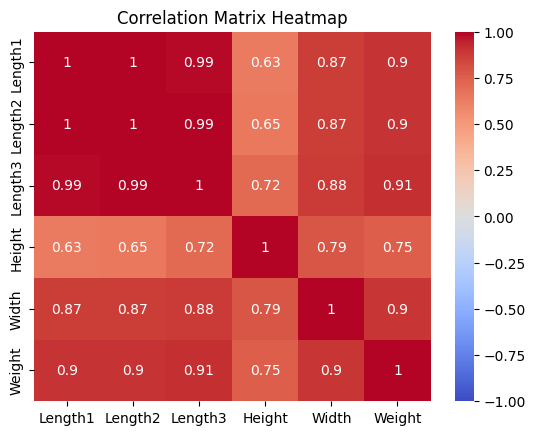

In [9]:
# Create a correlation matrix
correlation_matrix = df_train[["Length1", "Length2", "Length3", "Height", "Width", "Weight"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()